In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
states = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [3]:
hlr_folder = '/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/Hearing Loss/State data to analysis r'
hl = pd.DataFrame()
for state in states:
    hlr_file = f'{hlr_folder}/{state}.csv'
    df = pd.read_csv(hlr_file)
    hl = hl.append(df, ignore_index=True)

/var/folders/ch/jnm4tqzx5vs9wyxp0ls6q_br0000gp/T/ipykernel_65548/3713058223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hl = hl.append(df, ignore_index=True)
/var/folders/ch/jnm4tqzx5vs9wyxp0ls6q_br0000gp/T/ipykernel_65548/3713058223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hl = hl.append(df, ignore_index=True)
/var/folders/ch/jnm4tqzx5vs9wyxp0ls6q_br0000gp/T/ipykernel_65548/3713058223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hl = hl.append(df, ignore_index=True)
/var/folders/ch/jnm4tqzx5vs9wyxp0ls6q_br0000gp/T/ipykernel_65548/3713058223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hl = hl.append(df,

In [4]:
hd = pd.read_csv('/Users/duan114/Downloads/hd21.csv')
hd1 = hd[['FIPS','hlr_ad21']]
hl = hl.merge(hd1, on='FIPS',how='left')

In [5]:
hl = hl.dropna()

In [6]:
hl.columns

Index(['FIPS', 'poi_amount', 'Unnamed: 0', 'ST', 'STATE', 'ST_ABBR', 'STCNTY',
       'COUNTY', 'LOCATION', 'geometry', 'AREA_SQMI', 'poi_count', 'hl_pop',
       'male_hl_pop', 'female_hl_pop', 'male_hlr', 'female_hlr', 'hlr',
       'male_pop', 'female_pop', 'population', 'poi_area_density',
       'poi_pop_density', 'poi_cat_density', 'hlr_ad21'],
      dtype='object')

In [7]:
hl['poi_area_density_all'] = hl.poi_amount / hl.AREA_SQMI
hl['log_poi_density'] = np.log10(hl['poi_area_density_all'])
hl['log_pop'] = np.log10(hl['population'])

In [8]:
hl['z_score'] = (hl['log_poi_density'] - hl['log_poi_density'].mean()) / hl['log_poi_density'].std()
hl = hl[np.abs(hl['z_score']) < 2]

In [9]:
lower_quantile = hl['hlr_ad21'].quantile(1/3)
upper_quantile = hl['hlr_ad21'].quantile(2/3)
hl1 = hl[hl['hlr_ad21'] <= lower_quantile]
hl2 = hl[(hl['hlr_ad21'] > lower_quantile) & (hl['hlr'] <= upper_quantile)]
hl3 = hl[hl['hlr_ad21'] > upper_quantile]

In [10]:
import numpy as np
from scipy.stats import linregress
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(hl1['log_pop'], hl1['log_poi_density'])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(hl2['log_pop'], hl2['log_poi_density'])
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(hl3['log_pop'], hl3['log_poi_density'])
slope, intercept, r_value, p_value, std_err = linregress(hl['log_pop'], hl['log_poi_density'])

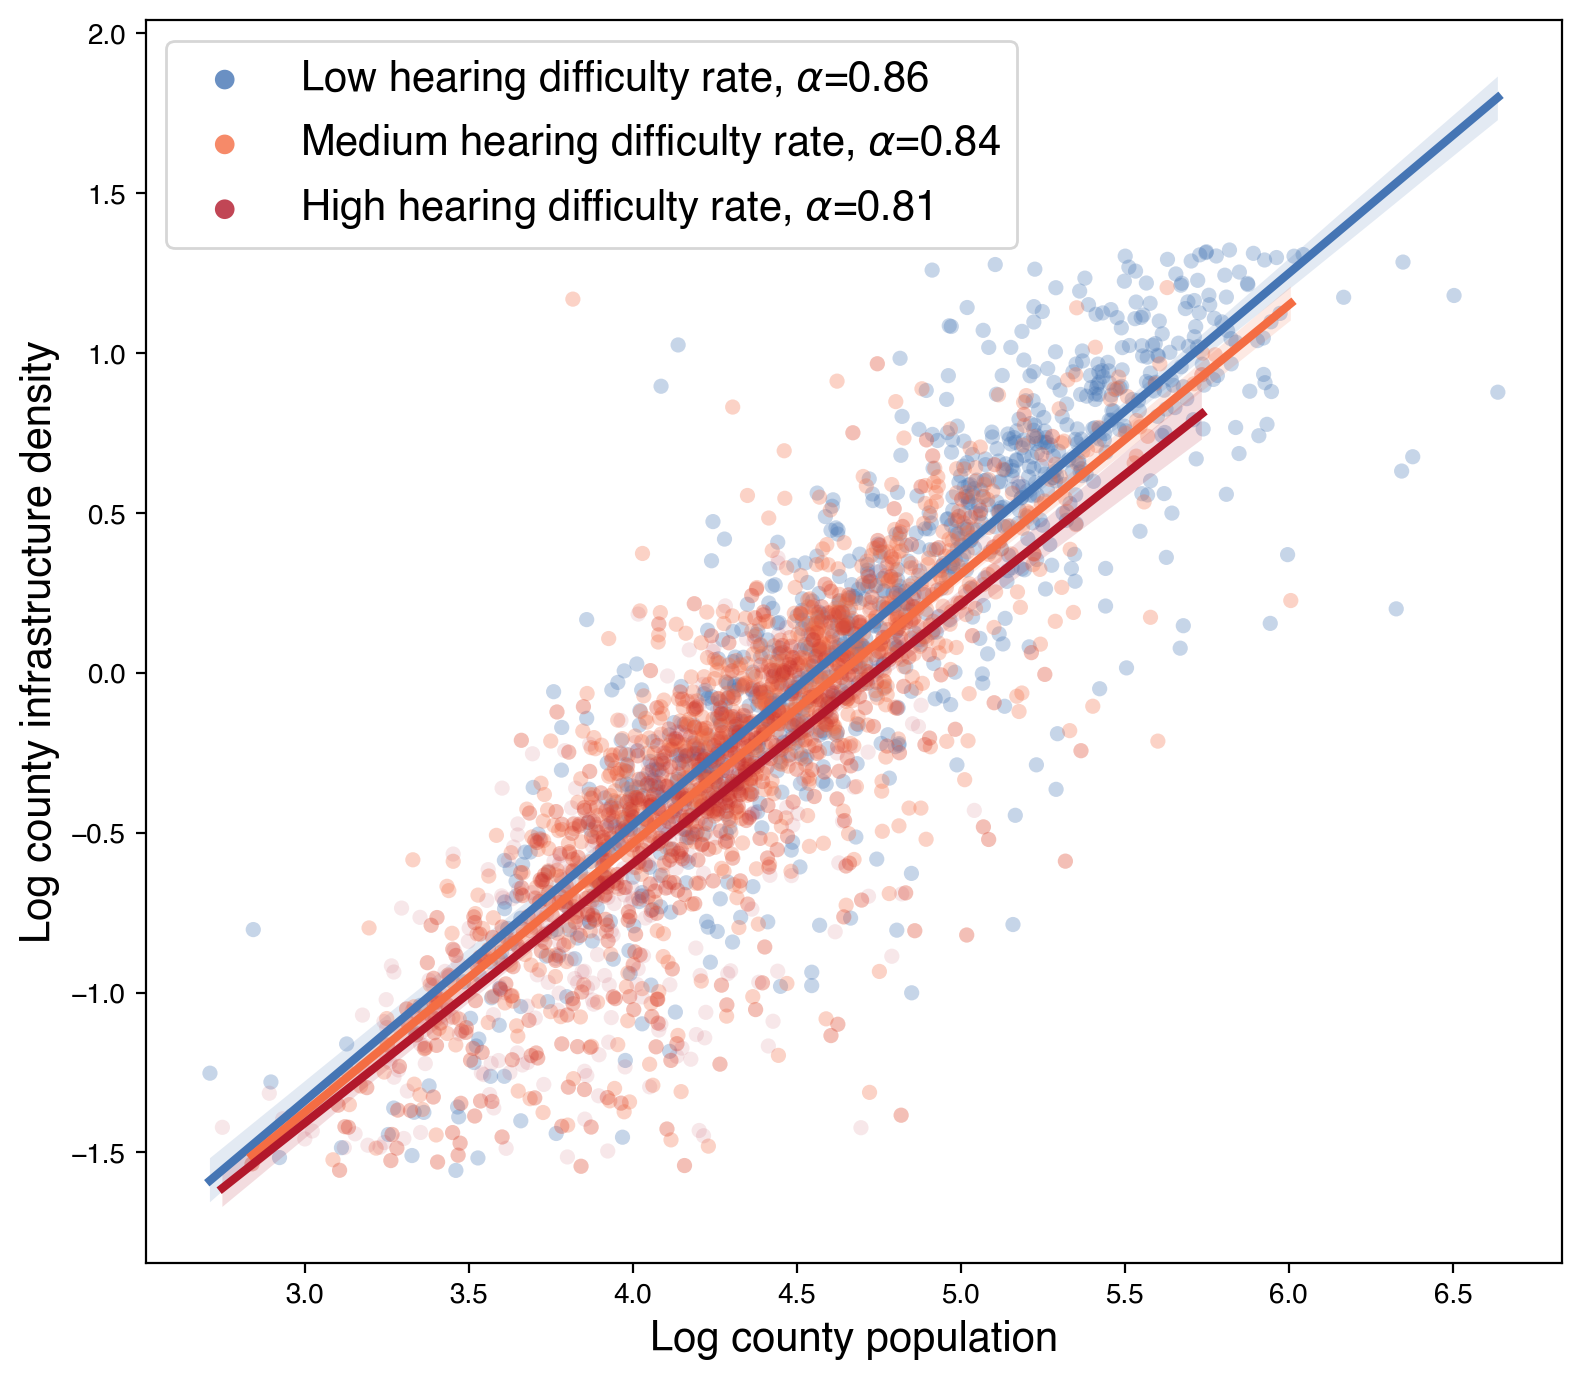

In [18]:
set_matplotlib_formats('retina')

plt.rcParams['font.family'] = 'Helvetica'

plt.figure(figsize=(8, 7))

scatter1 = sns.regplot(
    y='log_poi_density', 
    x='log_pop', 
    data=hl1,
    scatter_kws={'facecolors': '#4575b4', 'edgecolors': 'none', 's': 30, 'alpha': 0.3},
    line_kws={'color': '#4575b4', 'linewidth': 3},  
    scatter=True,
    fit_reg=True
)

scatter2 = sns.regplot(
    y='log_poi_density', 
    x='log_pop', 
    data=hl2,
    scatter_kws={'facecolors': '#f46d43', 'edgecolors': 'none', 's': 30, 'alpha': 0.3},
    line_kws={'color': '#f46d43', 'linewidth': 3},  
    scatter=True,
    fit_reg=True
)

scatter3 = sns.regplot(
    y='log_poi_density', 
    x='log_pop', 
    data=hl3,
    scatter_kws={'facecolors': '#b2182b', 'edgecolors': 'none', 's': 30, 'alpha': 0.1},
    line_kws={'color': '#b2182b', 'linewidth': 3}, 
    scatter=True,
    fit_reg=True
)

plt.xlabel('Log county population', fontsize=15)
plt.ylabel('Log county infrastructure density', fontsize=15)

scatter_legend = [plt.scatter([], [], color='#4575b4', label='Low hearing difficulty rate, $\\alpha$=0.86', s=50, edgecolors='none', alpha=0.8),
                  plt.scatter([], [], color='#f46d43', label='Medium hearing difficulty rate, $\\alpha$=0.84', s=50, edgecolors='none', alpha=0.8),
                  plt.scatter([], [], color='#b2182b', label='High hearing difficulty rate, $\\alpha$=0.81', s=50, edgecolors='none', alpha=0.8)]

plt.legend(handles=scatter_legend, loc='upper left', fontsize=15)

plt.tight_layout()

plt.show()


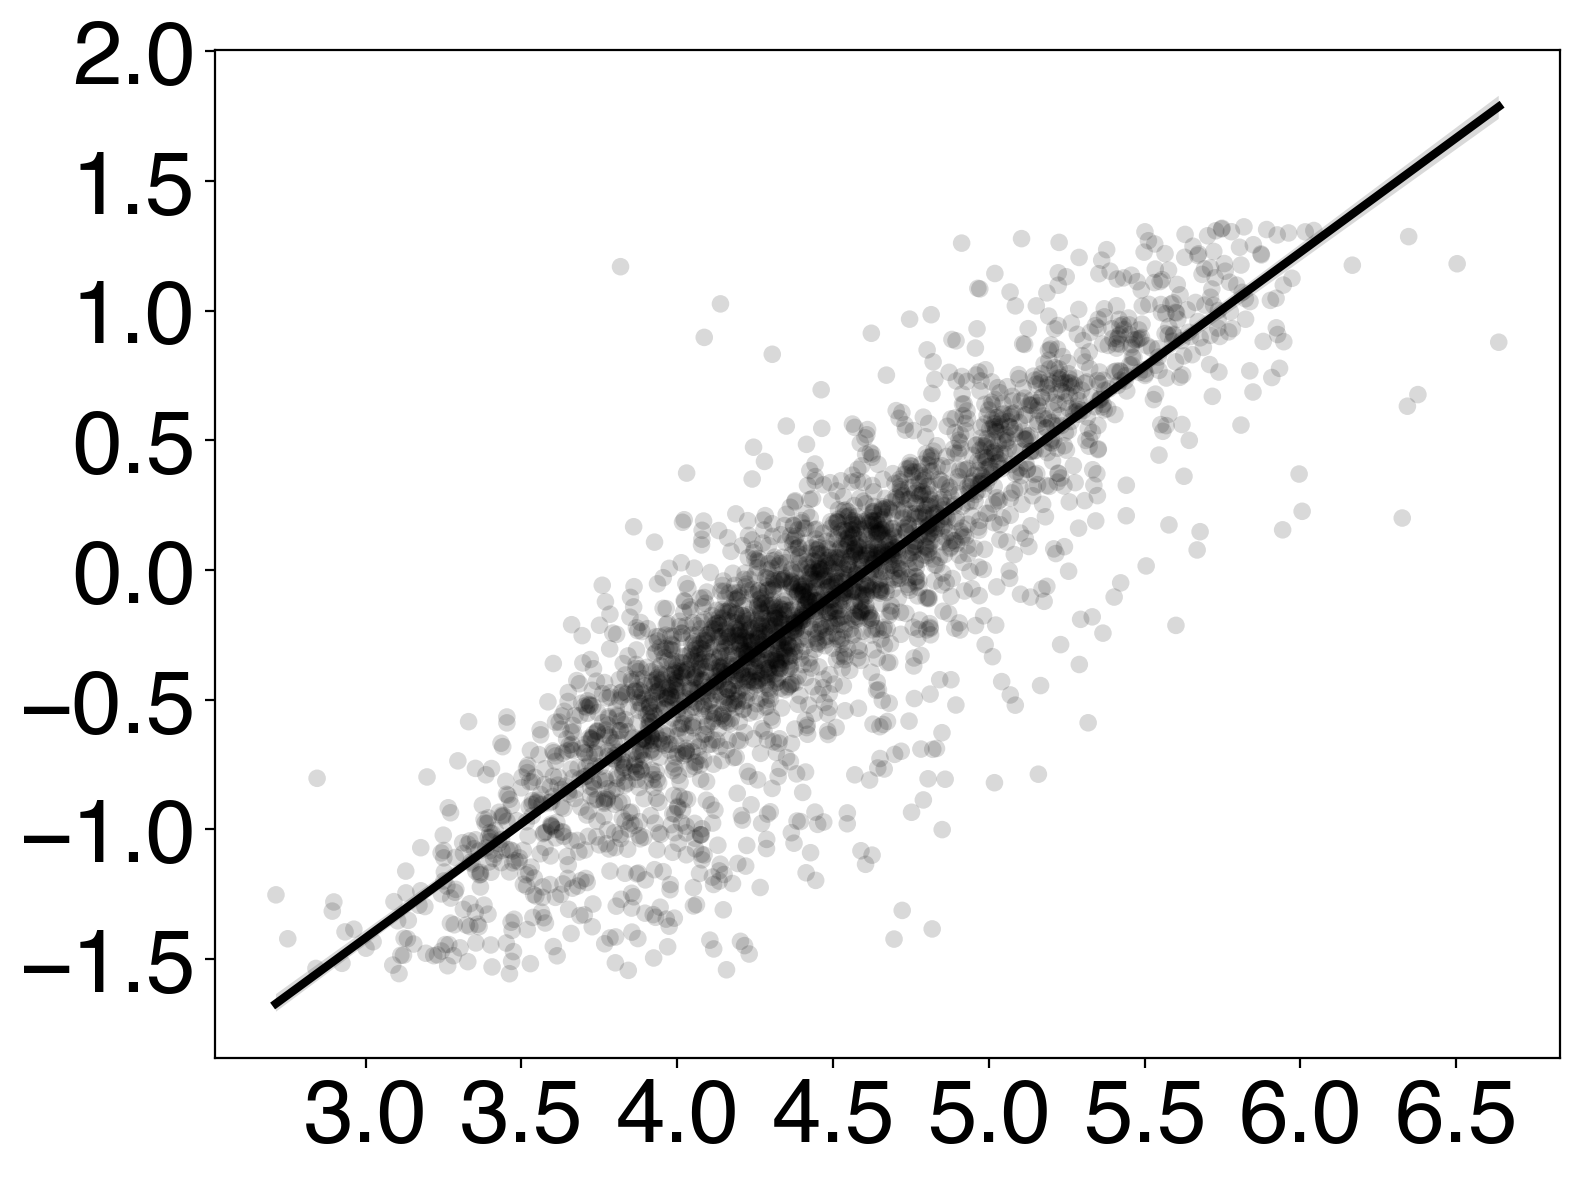

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats


set_matplotlib_formats('retina')


plt.rcParams['font.family'] = 'Helvetica'
plt.figure(figsize=(8, 6))

scatter1 = sns.regplot(
    y='log_poi_density', 
    x='log_pop', 
    data=hl,
    scatter_kws={'facecolors': 'black', 'edgecolors': 'none', 's': 40, 'alpha': 0.15},
    line_kws={'color': 'black', 'linewidth': 3},  
    scatter=True,
    fit_reg=True
)

plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

scatter_legend = [plt.scatter([], [], color='black', label='All counties, $\\alpha$=0.880', s=200, edgecolors='none', alpha=0.5)]
line_legend = [plt.Line2D([], [], color='black', linewidth=3, label='low hdr group slope')]

#plt.legend(handles=scatter_legend, loc='upper left', fontsize=30)

plt.tight_layout()

plt.show()